In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import GradientBoostingClassifier

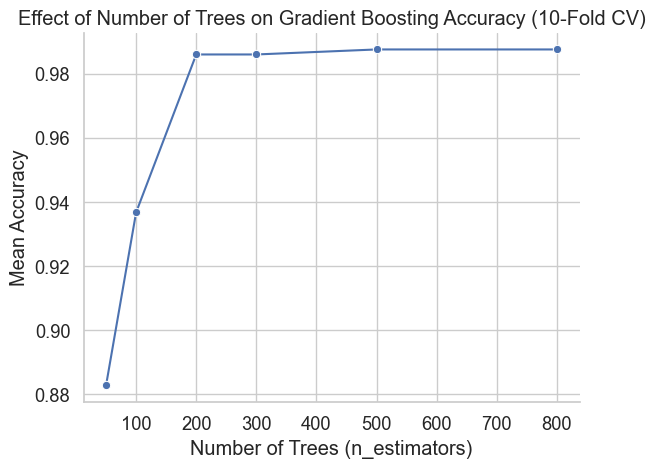

In [2]:
# Load preprocessed data
df = pd.read_pickle("untracked_data/data_prepro_train_01.pkl")

# Define 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Range of n_estimators values to test
n_estimators_list = [50, 100, 200, 300, 500, 800]

results = []

for n in n_estimators_list:
    # Build pipeline: vectorize text → gradient boosting classifier
    model = make_pipeline(
        CountVectorizer(),
        GradientBoostingClassifier(
            n_estimators=n,
            learning_rate=0.1,   # fixed while varying n_estimators
            max_depth=3,         # standard shallow trees for boosting
            subsample=1.0,
            random_state=42
        )
    )

    # Evaluate with cross-validation
    scores = cross_val_score(model, df['text'], df['label'], cv=kf, scoring='accuracy')
    results.append({"n_estimators": n, "mean_accuracy": scores.mean()})

# Convert to DataFrame
df_results = pd.DataFrame(results)

# Plot results
sns.set_theme(style="whitegrid", font_scale=1.2)
ax = sns.lineplot(
    data=df_results,
    x="n_estimators",
    y="mean_accuracy",
    marker="o"
)

# Customize plot
ax.set_title("Effect of Number of Trees on Gradient Boosting Accuracy (10-Fold CV)")
ax.set_xlabel("Number of Trees (n_estimators)")
ax.set_ylabel("Mean Accuracy")

sns.despine()


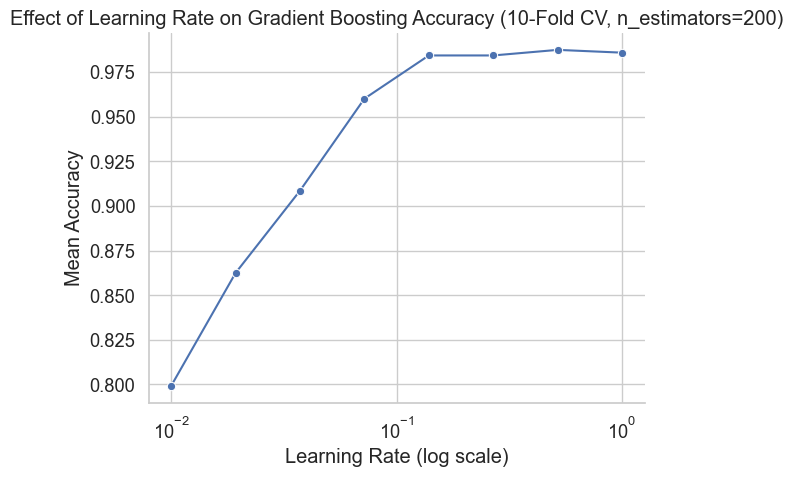

In [3]:
# Load preprocessed data
df = pd.read_pickle("untracked_data/data_prepro_train_01.pkl")

# Define 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Range of learning_rate values to test (log scale for nice spread)
learning_rates = np.logspace(-2, 0, 8)  # 0.01 → 1.0

results = []

for lr in learning_rates:
    # Build pipeline: vectorize text → gradient boosting classifier
    model = make_pipeline(
        CountVectorizer(),
        GradientBoostingClassifier(
            n_estimators=200,    # fixed from previous result
            learning_rate=lr,    # vary this
            max_depth=3,
            subsample=1.0,
            random_state=42
        )
    )

    # Evaluate with cross-validation
    scores = cross_val_score(model, df['text'], df['label'], cv=kf, scoring='accuracy')
    results.append({"learning_rate": lr, "mean_accuracy": scores.mean()})

# Convert to DataFrame
df_results = pd.DataFrame(results)

# Plot results
sns.set_theme(style="whitegrid", font_scale=1.2)
ax = sns.lineplot(
    data=df_results,
    x="learning_rate",
    y="mean_accuracy",
    marker="o"
)

# Customize plot
ax.set_xscale("log")
ax.set_title("Effect of Learning Rate on Gradient Boosting Accuracy (10-Fold CV, n_estimators=200)")
ax.set_xlabel("Learning Rate (log scale)")
ax.set_ylabel("Mean Accuracy")

sns.despine()

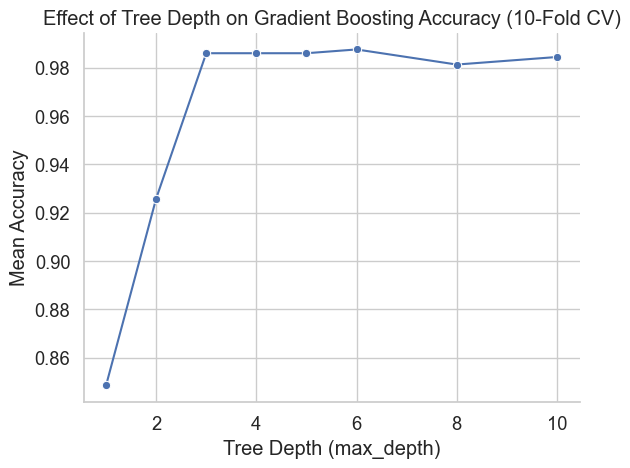

In [4]:
# Load preprocessed data
df = pd.read_pickle("untracked_data/data_prepro_train_01.pkl")

# Define 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Range of max_depth values to test
max_depth_values = [1, 2, 3, 4, 5, 6, 8, 10]

results = []

for d in max_depth_values:
    # Build pipeline: vectorize text → gradient boosting classifier
    model = make_pipeline(
        CountVectorizer(),
        GradientBoostingClassifier(
            n_estimators=200,
            learning_rate=0.1,
            max_depth=d,
            subsample=1.0,
            random_state=42
        )
    )

    # Evaluate with cross-validation
    scores = cross_val_score(model, df['text'], df['label'], cv=kf, scoring='accuracy')
    results.append({"max_depth": d, "mean_accuracy": scores.mean()})

# Convert to DataFrame
df_results = pd.DataFrame(results)

# Plot results
sns.set_theme(style="whitegrid", font_scale=1.2)
ax = sns.lineplot(
    data=df_results,
    x="max_depth",
    y="mean_accuracy",
    marker="o"
)

# Customize plot
ax.set_title("Effect of Tree Depth on Gradient Boosting Accuracy (10-Fold CV)")
ax.set_xlabel("Tree Depth (max_depth)")
ax.set_ylabel("Mean Accuracy")

sns.despine()

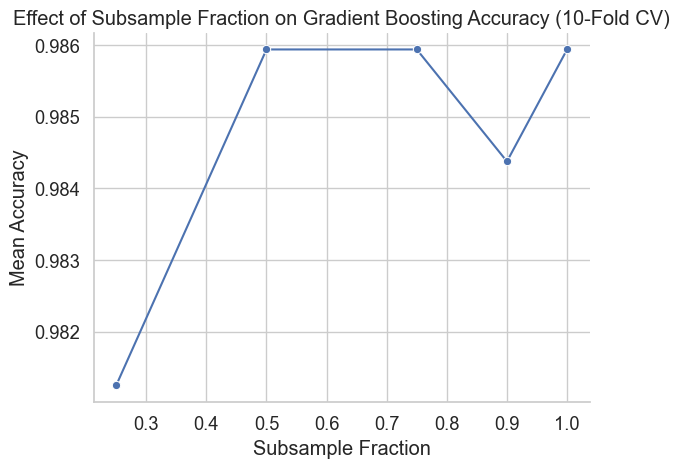

In [5]:
# Load preprocessed data
df = pd.read_pickle("untracked_data/data_prepro_train_01.pkl")

# Define 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Range of subsample values to test
subsample_values = [1.0, 0.9, 0.75, 0.5, 0.25]

results = []

for s in subsample_values:
    # Build pipeline: vectorize text → gradient boosting classifier
    model = make_pipeline(
        CountVectorizer(),
        GradientBoostingClassifier(
            n_estimators=200,
            learning_rate=0.1,
            max_depth=3,
            subsample=s,
            random_state=42
        )
    )

    # Evaluate with cross-validation
    scores = cross_val_score(model, df['text'], df['label'], cv=kf, scoring='accuracy')
    results.append({"subsample": s, "mean_accuracy": scores.mean()})

# Convert to DataFrame
df_results = pd.DataFrame(results)

# Plot results
sns.set_theme(style="whitegrid", font_scale=1.2)
ax = sns.lineplot(
    data=df_results,
    x="subsample",
    y="mean_accuracy",
    marker="o"
)

# Customize plot
ax.set_title("Effect of Subsample Fraction on Gradient Boosting Accuracy (10-Fold CV)")
ax.set_xlabel("Subsample Fraction")
ax.set_ylabel("Mean Accuracy")

sns.despine()


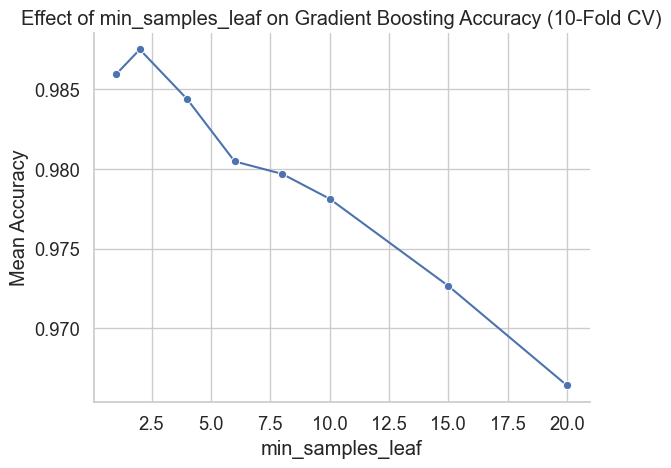

In [6]:
# Load preprocessed data
df = pd.read_pickle("untracked_data/data_prepro_train_01.pkl")

# Define 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Range of min_samples_leaf values to test
min_samples_leaf_values = [1, 2, 4, 6, 8, 10, 15, 20]

results = []

for m in min_samples_leaf_values:
    # Build pipeline: vectorize text → gradient boosting classifier
    model = make_pipeline(
        CountVectorizer(),
        GradientBoostingClassifier(
            n_estimators=200,
            learning_rate=0.1,
            max_depth=3,
            subsample=0.5,
            min_samples_leaf=m,
            random_state=42
        )
    )

    # Evaluate with cross-validation
    scores = cross_val_score(model, df['text'], df['label'], cv=kf, scoring='accuracy')
    results.append({"min_samples_leaf": m, "mean_accuracy": scores.mean()})

# Convert to DataFrame
df_results = pd.DataFrame(results)

# Plot results
sns.set_theme(style="whitegrid", font_scale=1.2)
ax = sns.lineplot(
    data=df_results,
    x="min_samples_leaf",
    y="mean_accuracy",
    marker="o"
)

# Customize plot
ax.set_title("Effect of min_samples_leaf on Gradient Boosting Accuracy (10-Fold CV)")
ax.set_xlabel("min_samples_leaf")
ax.set_ylabel("Mean Accuracy")

sns.despine()


In [3]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Load data
df = pd.read_pickle("untracked_data/data_prepro_train_01.pkl")

# --- Manual n-gram toggle ---
ngram_range = (1, 2)   # set to (1, 2) for unigrams + bigrams

# Define pipeline with default Gradient Boosting
pipeline = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=ngram_range)),
    ('clf', GradientBoostingClassifier(random_state=42))
])

# Define 10-fold stratified CV
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(
    pipeline,
    df['text'],
    df['label'],
    cv=cv,
    scoring='accuracy',
    n_jobs=-1
)

# Print results
print(f"Fold accuracies: {np.round(scores, 4)}")
print(f"Mean CV accuracy: {scores.mean():.4f} ")


Fold accuracies: [0.7969 0.7344 0.8125 0.7812 0.8281 0.7969 0.7656 0.7969 0.8438 0.75  ]
Mean CV accuracy: 0.7906 


In [1]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Load data
df = pd.read_pickle("untracked_data/data_prepro_train_01.pkl")

# --- Manual n-gram toggle ---
ngram_range = (1, 2)   # set to (1, 1) for unigrams only

# Define pipeline
pipeline = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=ngram_range)),
    ('clf', GradientBoostingClassifier(random_state=42))
])

# Define parameter grid
param_grid = {
    'vectorizer__min_df': [1, 2, 5, 10],          # sparse-term removal
    'clf__learning_rate': [0.01, 0.05, 0.1, 0.2], # step size per boosting stage
    'clf__max_depth': [2, 3, 5, 10],              # depth of individual trees
    'clf__n_estimators': [100, 300]          # number of boosting stages
}

# Cross-validation setup
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Grid search
grid = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1,
    verbose=3
)

# Fit model
grid.fit(df['text'], df['label'])

# Print results
print("Best params:", grid.best_params_)
print(f"Best mean CV accuracy: {grid.best_score_:.4f}")


Fitting 10 folds for each of 128 candidates, totalling 1280 fits
[CV 1/10] END clf__learning_rate=0.01, clf__max_depth=2, clf__n_estimators=100, vectorizer__min_df=1;, score=0.734 total time=   2.1s
[CV 4/10] END clf__learning_rate=0.01, clf__max_depth=2, clf__n_estimators=100, vectorizer__min_df=1;, score=0.688 total time=   2.1s
[CV 5/10] END clf__learning_rate=0.01, clf__max_depth=2, clf__n_estimators=100, vectorizer__min_df=1;, score=0.812 total time=   2.1s
[CV 8/10] END clf__learning_rate=0.01, clf__max_depth=2, clf__n_estimators=100, vectorizer__min_df=1;, score=0.672 total time=   2.1s
[CV 6/10] END clf__learning_rate=0.01, clf__max_depth=2, clf__n_estimators=100, vectorizer__min_df=1;, score=0.672 total time=   2.0s
[CV 3/10] END clf__learning_rate=0.01, clf__max_depth=2, clf__n_estimators=100, vectorizer__min_df=1;, score=0.734 total time=   2.1s
[CV 2/10] END clf__learning_rate=0.01, clf__max_depth=2, clf__n_estimators=100, vectorizer__min_df=1;, score=0.656 total time=   2.

In [5]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Load data
df = pd.read_pickle("untracked_data/data_prepro_train_01.pkl")

# --- Manual n-gram toggle ---
ngram_range = (1, 1)   # set to (1, 1) for unigrams only

# Define pipeline with best parameters
pipeline = Pipeline([
    ('vectorizer', CountVectorizer(
        ngram_range=ngram_range,
        min_df=20
    )),
    ('clf', GradientBoostingClassifier(
        learning_rate=0.2,
        max_depth=5,
        n_estimators=900,
        random_state=42
    ))
])

# Define 10-fold cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Evaluate model
scores = cross_val_score(
    pipeline,
    df['text'],
    df['label'],
    cv=cv,
    scoring='accuracy',
    n_jobs=-1
)

# Print results
print(f"Fold accuracies: {np.round(scores, 4)}")
print(f"Mean CV accuracy: {scores.mean():.4f} ± {scores.std():.4f}")


Fold accuracies: [0.7969 0.75   0.875  0.7969 0.875  0.7969 0.75   0.8281 0.875  0.8281]
Mean CV accuracy: 0.8172 ± 0.0453
